# Support Vector Machines

In [189]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [193]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', SVC(kernel='linear', C=1, loss='hinge')),
])

svm_clf.fit(X, y)

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [13]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge'))
     ])

polynomial_svm_clf.fit(X, y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

Fuck this book.... jipity time

# IMPORTS

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

## Test train split

In [101]:
X, y = make_moons(n_samples=500, noise = 0.2, random_state= 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Training

In [104]:
svm_clf = SVC(kernel="rbf", C=1, gamma = 0.5)
svm_clf.fit(X_train, y_train)

SVC(C=1, gamma=0.5)

## Evaluating

In [107]:
y_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)
# for val, true in zip(y_pred, y_train):
#     print(val, true)

In [109]:
cross_val_score(svm_clf, X_train, y_train, cv=10, scoring="f1_macro").mean()


0.9542483201306731

## Visualizing Results

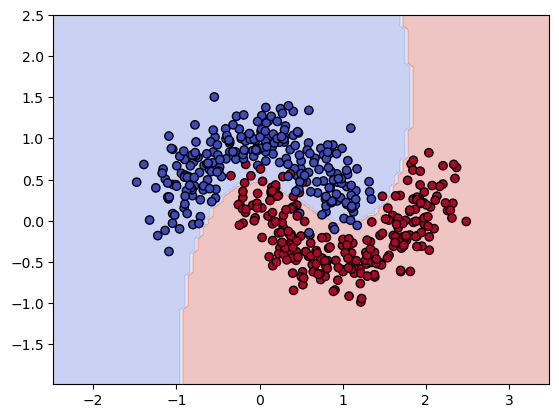

In [112]:
def plot_decision_boundary(model, X, y):
    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
        np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_new).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, alpha=0.3, cmap = "coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
    plt.show()

plot_decision_boundary(svm_clf, X, y)

## Standardizing data and going again

In [115]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
svm_clf_scaled = SVC(kernel="rbf", gamma=0.5, C=1)
svm_clf_scaled.fit(X_train, y_train)

SVC(C=1, gamma=0.5)

In [119]:
cross_val_score(svm_clf_scaled, X_train, y_train, cv=10, scoring="f1_macro").mean()

0.9685574229691877

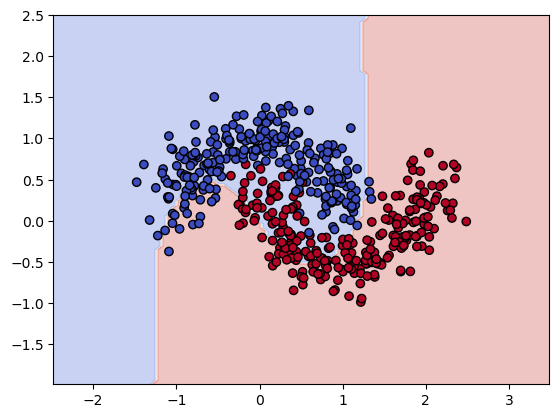

In [121]:
plot_decision_boundary(svm_clf_scaled, X, y)

## Now we tune hyper params

In [124]:
svm_hyper = SVC()
# svm_hyper.fit(X_train, y_train)

# cross_val_score(svm_hyper, X_train, y_train, cv=10, scoring="f1_macro").mean()

In [136]:
param_grid = [{'kernel': ['poly', 'linear', 'rbf'], 'C': [0.1, 0.2, 0.3, 0.4,0.5,1, 1.2, 1.5, 2, 3, 4, 5], 'gamma': [0.1, 0.2, 0.5, 1, 1.5, 2, 4]}]

grid_search = GridSearchCV(svm_hyper, param_grid, cv = 5, scoring = "f1_macro", return_train_score=True)

In [138]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.2, 1.5, 2, 3, 4,
                                5],
                          'gamma': [0.1, 0.2, 0.5, 1, 1.5, 2, 4],
                          'kernel': ['poly', 'linear', 'rbf']}],
             return_train_score=True, scoring='f1_macro')

In [140]:
grid_search.best_params_

{'C': 3, 'gamma': 2, 'kernel': 'rbf'}

In [142]:
cross_val_score(svm_hyper, X_train, y_train, cv=3, scoring="f1_macro").mean()

0.9598972990665117

## Ok run it on the test data... we done here

In [151]:
y_pred = grid_search.predict(X_test)

In [153]:
f1_score(y_test, y_pred)

0.9726027397260273

wow the vibes.... even better on the test set.... wooow, nasa where you at, im ready to sabotage space x by blowing up the mar space station and sinking musks career.... woow. huh what.

# Iris dataset

In [538]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import f1_score, ConfusionMatrixDisplay

In [546]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [548]:
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [550]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [552]:
svc_iris = SVC(kernel="rbf", C=1.3, gamma=0.3)

svc_iris.fit(X_train, y_train)

SVC(C=1.3, gamma=0.3)

In [554]:
cross_val_score(svc_iris, X_train, y_train, cv =5, scoring="f1_macro")

array([0.95816993, 1.        , 0.81481481, 1.        , 0.95475113])

In [556]:
y_pred = cross_val_predict(svc_iris, X_train, y_train, cv=3)

In [558]:
f1_score(y_train, y_pred, average='macro')

0.9566807313642757

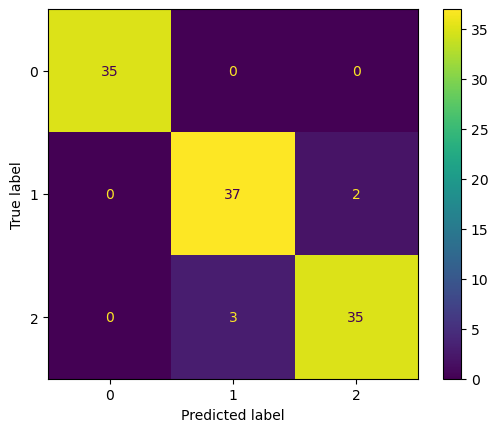

In [560]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

## Lets try a polynoamial model

In [564]:
svc_poly = SVC(kernel='poly', degree = 3, C=1.1)

svc_poly.fit(X_train, y_train)

SVC(C=1.1, kernel='poly')

In [566]:
y_pred = cross_val_predict(svc_poly, X_train, y_train, cv=3)

In [568]:
f1_score(y_train, y_pred, average="macro")

0.9023912417170844

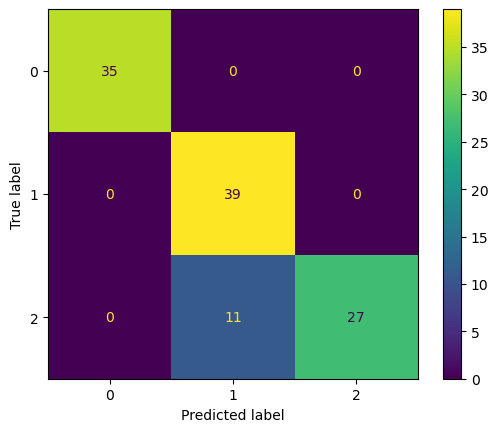

In [570]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

## Can you do linear on this data?

In [573]:
svc_lin = SVC(kernel="linear", C=1)

svc_lin.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [575]:
y_pred = cross_val_predict(svc_lin, X_train, y_train, cv=3)

In [577]:
f1_score(y_train, y_pred, average='macro')

0.9566807313642757

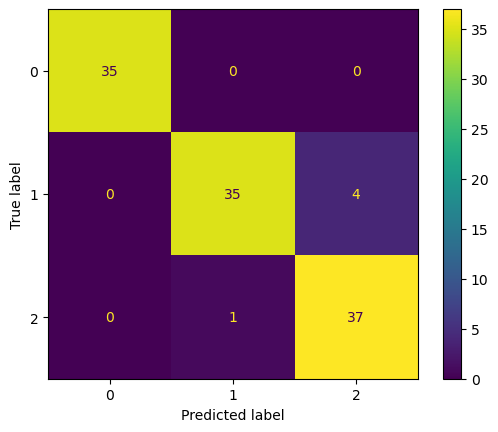

In [579]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

Linear kinda op on this dataset tbh.... surprising to me, but i am a troglodyte